In [1]:
import DeepLabModel
import os, urllib
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from DCSegUtils import softmax

In [2]:
def load_models():    
    _DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
    model_dir = '../models/'
    _MODEL_URLS = {
        'mobilenetv2_coco_voctrainaug':
            'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
        'mobilenetv2_coco_voctrainval':
            'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz',
        'xception_coco_voctrainaug':
            'deeplabv3_pascal_train_aug_2018_01_04.tar.gz',
        'xception_coco_voctrainval':
            'deeplabv3_pascal_trainval_2018_01_04.tar.gz',
    }
    models = dict()
    for modelname, tarname in _MODEL_URLS.items():
        download_path = os.path.join(model_dir, tarname)
        if not os.path.isfile(download_path):
            print('downloading {}, this might take a while...'.format(modelname))
            urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + _MODEL_URLS[modelname],
                               download_path)
            print('download completed!')
            
        else:
            print("model already present at {}".format(download_path))
        
        print('Loading model {}...'.format(modelname))
        models[modelname] = DeepLabModel.DeepLabModel(download_path)
        print('{} loaded successfully!'.format(modelname))
    return models
models = load_models()

model already present at ../models/deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz
Loading model mobilenetv2_coco_voctrainval...
mobilenetv2_coco_voctrainval loaded successfully!
model already present at ../models/deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
Loading model mobilenetv2_coco_voctrainaug...
mobilenetv2_coco_voctrainaug loaded successfully!
model already present at ../models/deeplabv3_pascal_trainval_2018_01_04.tar.gz
Loading model xception_coco_voctrainval...
xception_coco_voctrainval loaded successfully!
model already present at ../models/deeplabv3_pascal_train_aug_2018_01_04.tar.gz
Loading model xception_coco_voctrainaug...
xception_coco_voctrainaug loaded successfully!


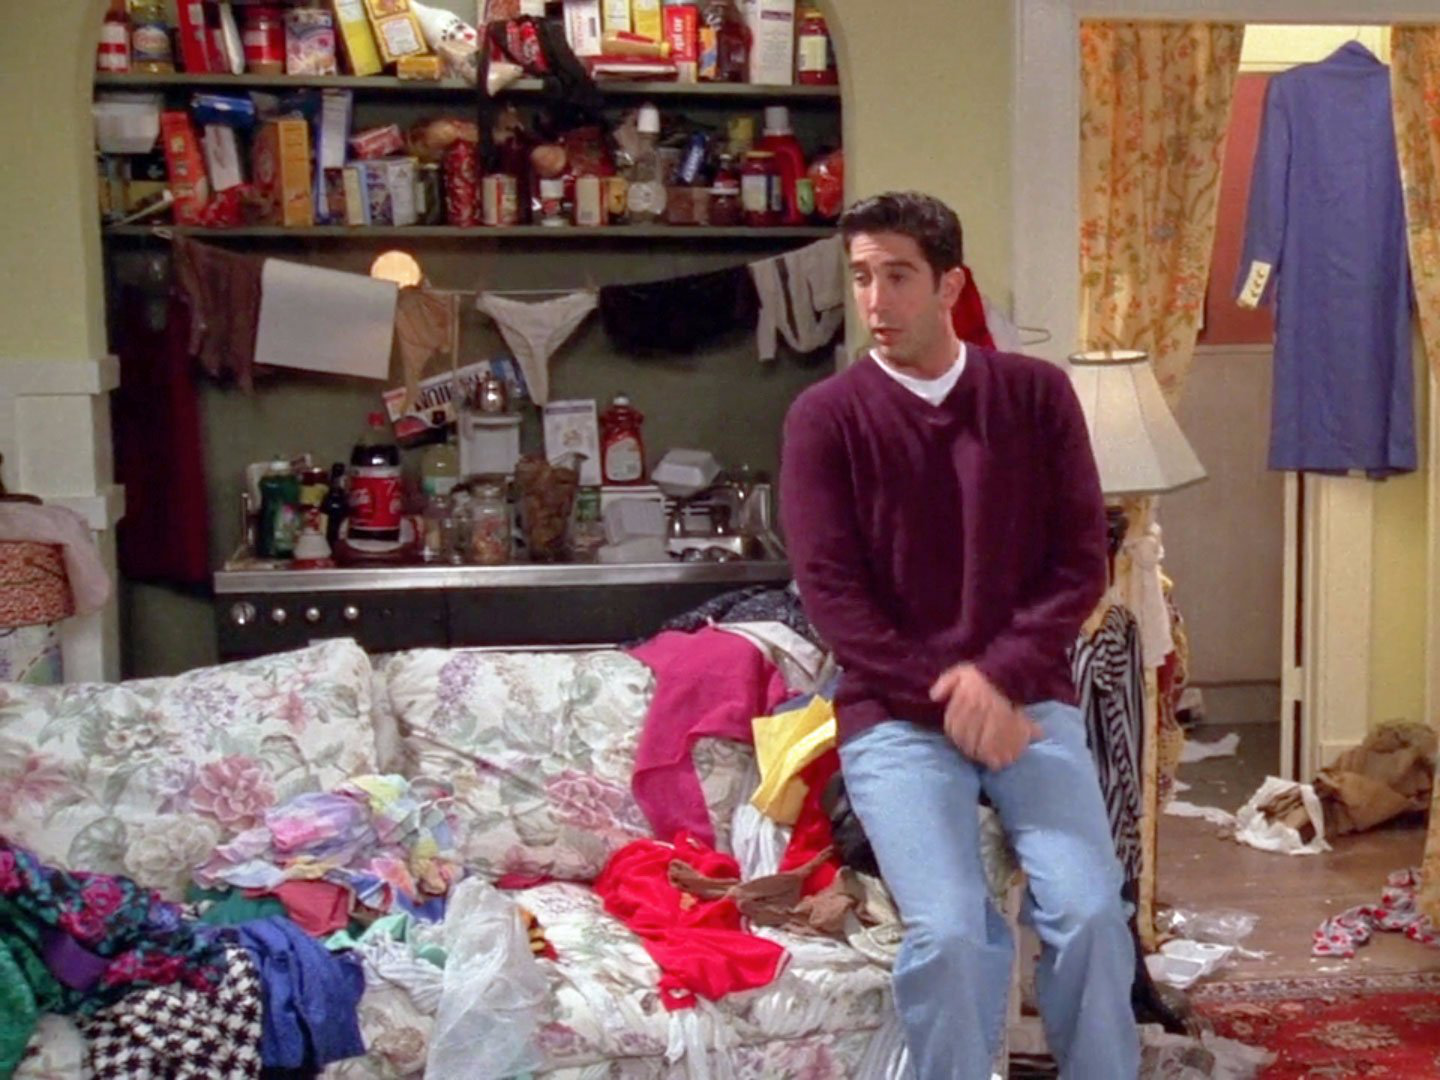

In [3]:
# Download an image and start negotiation
#url = 'http://farm8.static.flickr.com/7920/47425338881_de208df2ff_m.jpg'
#url = 'https://cdn.vox-cdn.com/uploads/chorus_asset/file/8327269/Screen_Shot_2017_04_12_at_3.54.13_PM.png'
#url = 'https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fimages.fastcompany.net%2Fimage%2Fupload%2Fw_596%2Cc_limit%2Cq_auto%3Abest%2Cf_auto%2Cfl_lossy%2Ffc%2F1683481-inline-s-2-dog-tv-share-the-remote-control.jpg&f=1'
#url = 'https://www.zastavki.com/pictures/originals/2013/People_Shadows_of_people_looked_047805_.jpg'
url = 'https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic3.businessinsider.com%2Fimage%2F5a37ce4eec1ade2ce2284b8f-1440%2Ffriends-messy-room.jpg&f=1'
f = urllib.request.urlopen(url)
jpeg_str = f.read()
original_im = Image.open(BytesIO(jpeg_str))
original_im

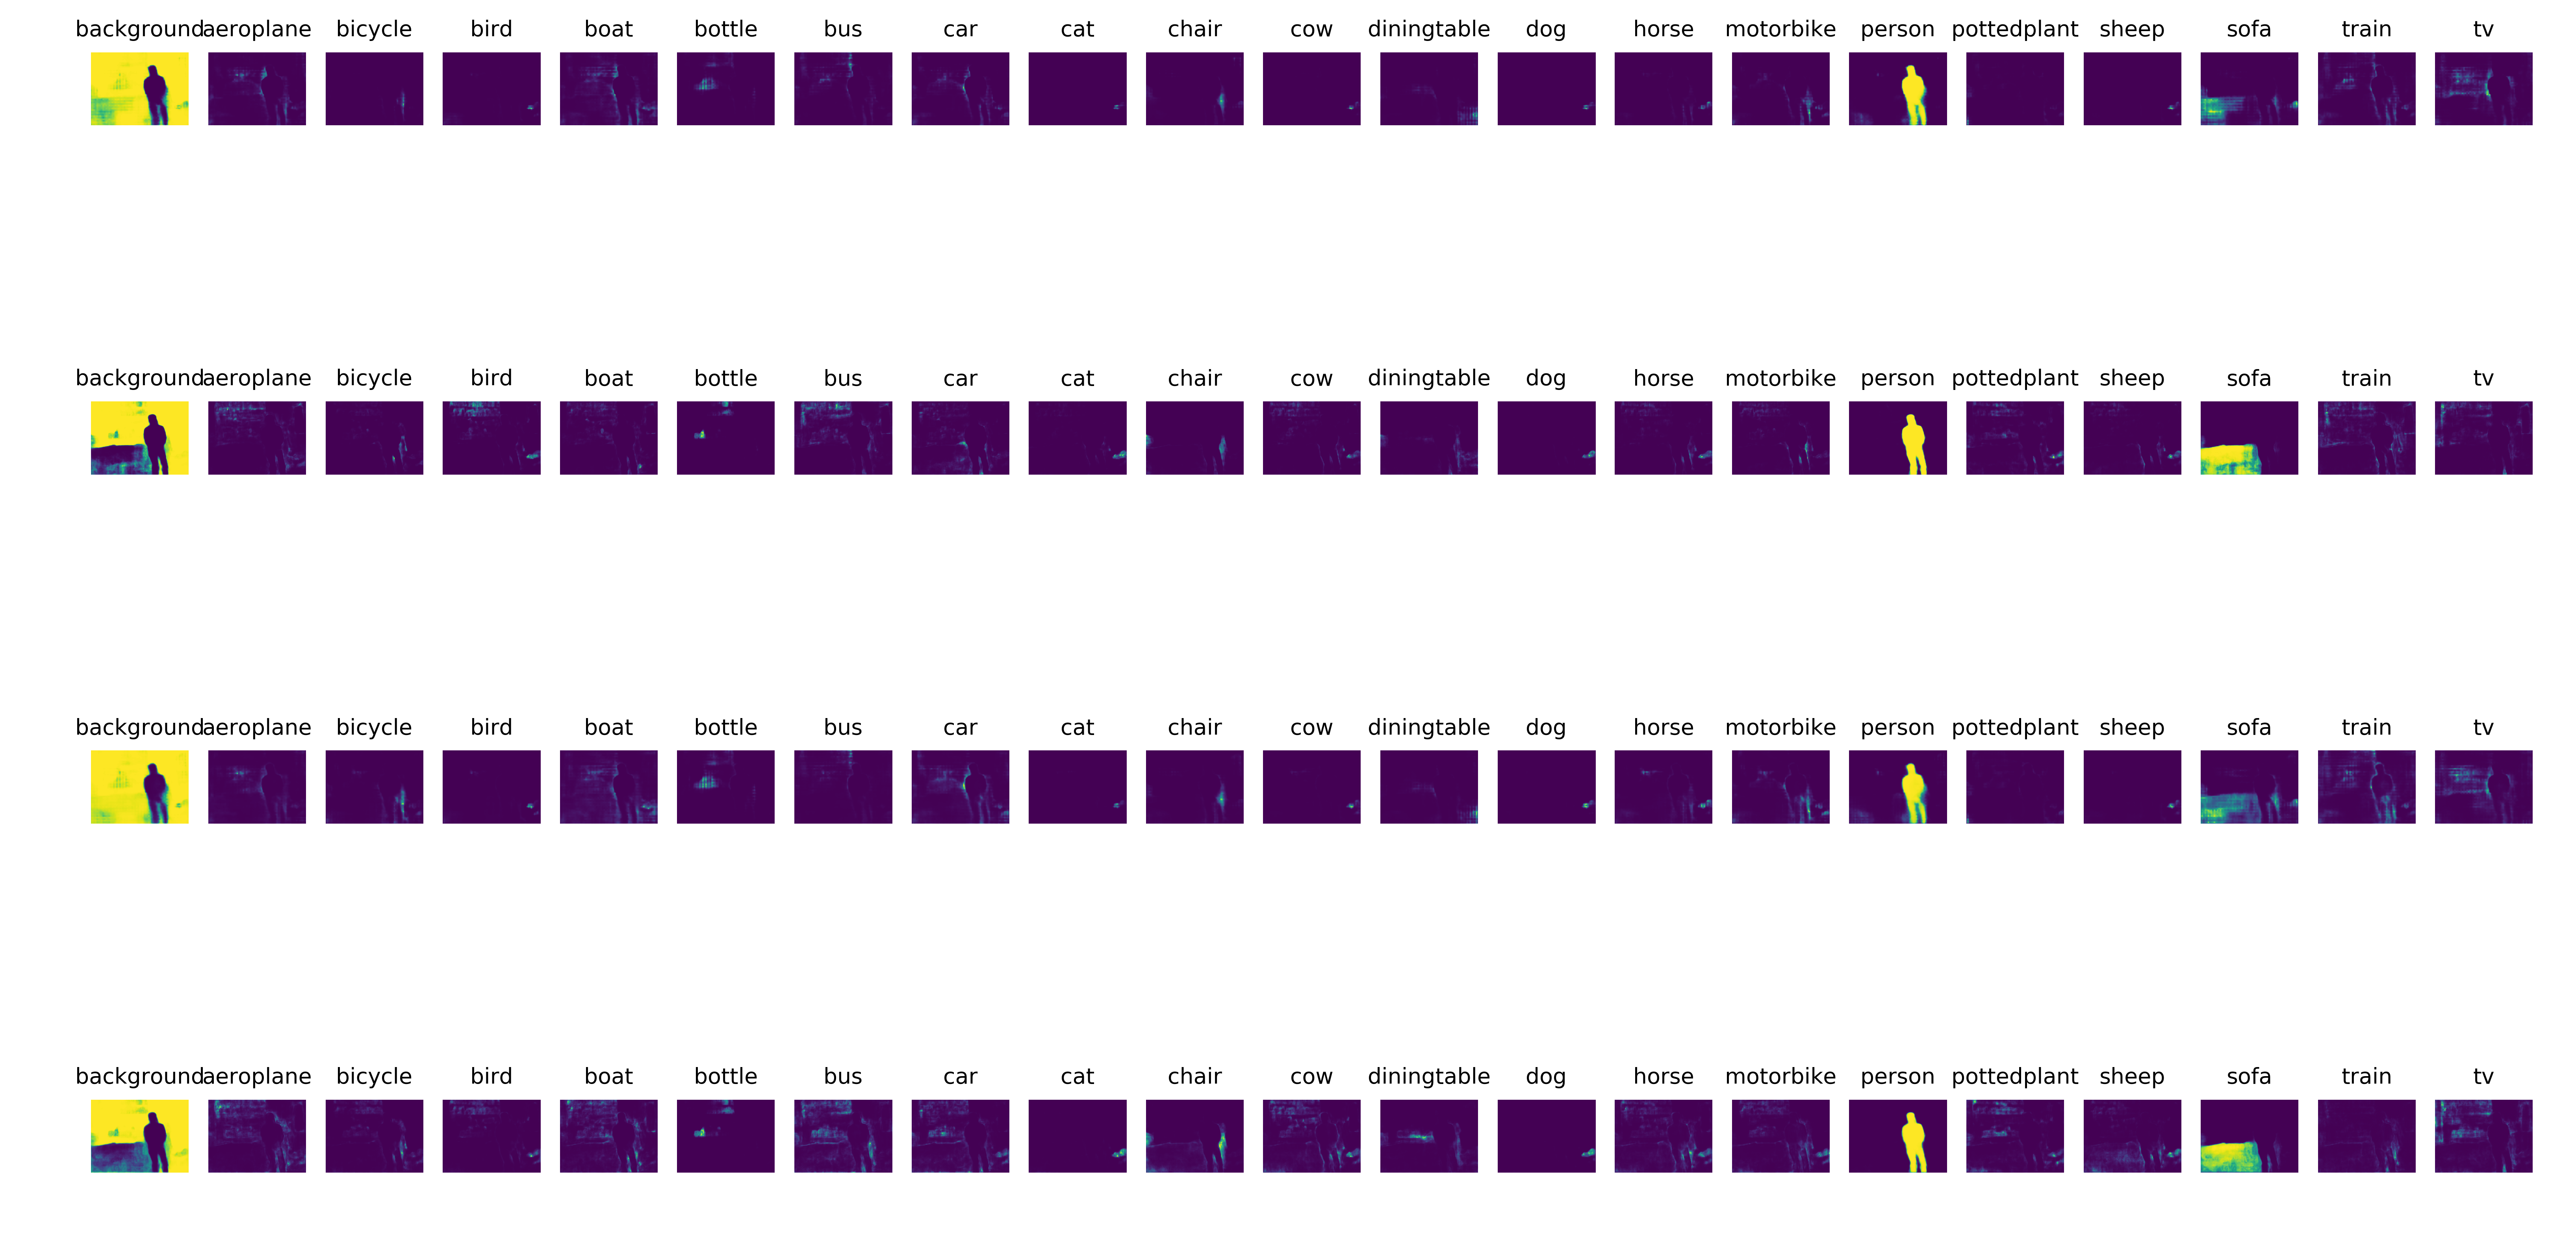

In [22]:
segmentations = []

fig = plt.figure(figsize=(16,9), dpi=500)
grid_spec = gridspec.GridSpec(4, 21, width_ratios= [1]*21)
for m, (mname, model) in enumerate(models.items()):
    in_resized, segm = model.run(original_im)
    segm=segm[:in_resized.size[1], :in_resized.size[0], ...]
    srgm_softmax = softmax(segm, axis=-1)
    segmentations.append(srgm_softmax)
    for l in range(segm.shape[-1]):
        plt.subplot(grid_spec[m, l])
        plt.axis('off')
        plt.title(DeepLabModel.LABEL_NAMES[l], fontsize=8)
        plt.imshow(srgm_softmax[..., l])
plt.show()

In [6]:
segmentations[0].shape

(513, 513, 21)

In [23]:
def utility(x, y):
    return np.array([ for l in range(x.shape[-1])])
utility(segmentations[0],segmentations[0])

SyntaxError: invalid syntax (<ipython-input-23-98bbd7d85cad>, line 2)

In [19]:
in_resized.size

(513, 384)

In [29]:
p = np.random.random()
np.stack([a,b], axis=0).shape

(2, 3)